## ML Algorithms, Part 4, K-Nearest Neighbors

In this article we will discuss a very simple yet powerful algorithm, K-Nearest Neighbors. This algorithm can be used both for regression and classification but we will only present the later here. Simplicity and performance are the advantages of KNN but there are also severe drawbacks, the most prominent one being that this algorithm needs to keep all the data in memory and therefore does not scale well with larger amounts of data. Nonetheless, it is an important algorithm."

K-Nearest Neighbors Classfier works as follows: Given a point, it looks at the closest K points, takes a count ("votes") of how many points belong to each class, and assigns the original point to the class with the highest (vote) count.

#### Imports

In [1]:
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # this library uses matplotlib to create attractive visualizations
import pandas as pd
from sklearn.datasets import load_iris # this will load another famous ML dataset called Iris 
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

data = iris.data
Y = iris.target

# check shapes
# 150 flowers, with 4 measurements for each
data.shape, Y.shape

((150, 4), (150,))

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
%%html
<img src="https://www.tensorflow.org/versions/r1.5/images/iris_three_species.jpg">
<a href="https://www.tensorflow.org/versions/r1.5/get_started/get_started_for_beginners">Image from Tensorflow.org</a></img>

<br>"From left to right, Iris setosa (by Radomil, CC BY-SA 3.0), Iris versicolor (by Dlanglois, CC BY-SA 3.0), 
and Iris virginica (by Frank Mayfield, CC BY-SA 2.0)."

### Visualizations

In [5]:
# Put the data in a DataFrame for a more appealing view
# df is a standard naming for DataFrames
df = pd.DataFrame(np.concatenate([data, Y.reshape((150,1))],axis=1), columns=iris.feature_names+["Flower type"])

# we create a new column where we can see the names of the flowers
df["Flower name"] = df["Flower type"].apply(lambda x: iris.target_names[int(x)])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower type,Flower name
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


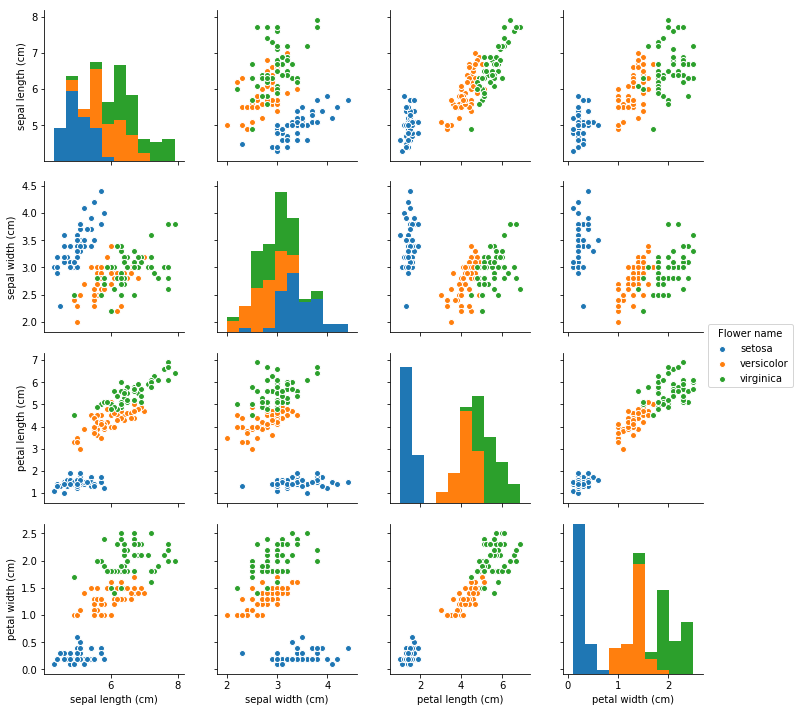

In [7]:
# we don't need to plot the flower type columns twice
# and since it is a categorical value, we prefer the name 
plot_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                'petal width (cm)', 'Flower name']

# This plots all variables against each other, 
# and colors by type of flower name
# the diagonal is filled by histograms
sns.pairplot(df[plot_columns], hue="Flower name")

We can see that the 3 classes are quite separable. Let's quickly proceed to modeling. I will use petal length and petal width as the X variables.

In [8]:
X = df[["petal length (cm)", "petal width (cm)"]]

#### Split the data into training and test sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

### Model definition and fitting

The most important parameter we need to define is K. A bigger K means we end up overfitting. A K of 5 (the default value) is usually a good starting choice.

In [10]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
print("Training accuracy: {:.2f}%".format(knn.score(x_train, y_train)*100))

Training accuracy: 96.43%


In [12]:
print("Testing accuracy: {:.2f}%".format(knn.score(x_test, y_test)*100))

Testing accuracy: 94.74%


The training and testing accuracy are both quite high. Sometimes you might notice that the training accuracy is lower than the testing accuracy, but that is not an important concern since it is the result of splitting at random. Rerun the split multiple times and you will see it change.

### Visualization: Decision Boundary

How can we visualize the results? There are two ways: We can visualize the points in a scatterplot colored based on whether they were classified correctly, or we can create a decision boundary.

The code was shamelessly copy-pasted from [the sklearn docs](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py) so take a look at the original. Working with a meshgrid is a bit hard but you can think of it this way: Consider the plot below to be comprised of patches. Now we classify each patch using the KNN classifier we built and we color it accordingly.

red -> setosa
green -> versicolor
blue -> virginica


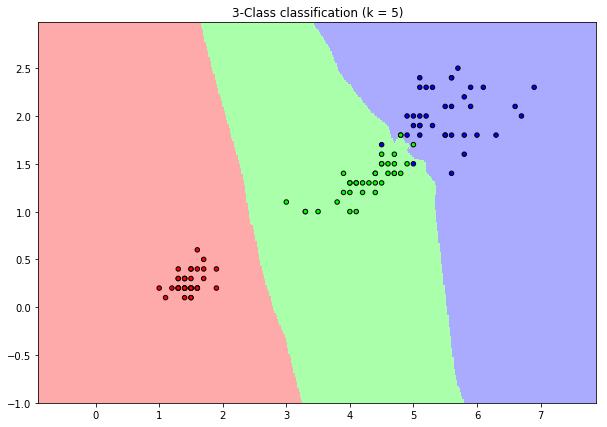

In [13]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = x_train.values.min() - 1, x_train.values.max() + 1
y_min, y_max = y_train.min() - 1, y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_train.values[:,0], x_train.values[:,1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {})".format(5))

for color, flower in zip(["red","green","blue"],iris.target_names):
    print("{} -> {}".format(color, flower))

This was a quick article, but that is all there is to K-Nearest Neighbors. So far we have only discussed supervised learning, where we knew the target variables. In the next article we will continue with KMeans, an algorithm most commonly used for Unsupervised Learning, where instead of trying to estimate the form of a relationship or predict a category, we try to discover unknown patterns.